In [1]:
kaggle datasets download rahmasleam/flowers-dataset


Dataset URL: https://www.kaggle.com/datasets/rahmasleam/flowers-dataset
License(s): apache-2.0
 95% 209M/219M [00:01<00:00, 136MB/s]
100% 219M/219M [00:01<00:00, 124MB/s]


# New Section

In [2]:
unzip /content/flowers-dataset.zip

Archive:  /content/flowers-dataset.zip
  inflating: flower_photos/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flower_photos/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flower_photos/daisy/10172379554_b296050f82_n.jpg  
  inflating: flower_photos/daisy/10172567486_2748826a8b.jpg  
  inflating: flower_photos/daisy/10172636503_21bededa75_n.jpg  
  inflating: flower_photos/daisy/102841525_bd6628ae3c.jpg  
  inflating: flower_photos/daisy/1031799732_e7f4008c03.jpg  
  inflating: flower_photos/daisy/10391248763_1d16681106_n.jpg  
  inflating: flower_photos/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flower_photos/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flower_photos/daisy/10466290366_cc72e33532.jpg  
  inflating: flower_photos/daisy/10466558316_a7198b87e2.jpg  
  inflating: flower_photos/daisy/10555749515_13a12a026e.jpg  
  inflating: flower_photos/daisy/10555815624_dc211569b0.jpg  
  inflating: flower_phot

In [3]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
imgdir='/content/flower_photos'

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # Add validation split here

# ... (other code)

# Remove 'subset' argument and use the same directory for both train and validation
traingen = train_datagen.flow_from_directory(imgdir,
                                         target_size=(64,64),
                                         batch_size=16,
                                         subset='training'  # Keep subset='training' here
                                          )
testgen = train_datagen.flow_from_directory(imgdir,  # Use the same ImageDataGenerator
                                         target_size=(64,64),
                                         batch_size=16,
                                         subset='validation'  # Keep subset='validation' here
                                          )

# ... (rest of the code)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),padding='same',input_shape=(64,64,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(5,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649,669 (13.92 MB)

 Trainable params: 3,649,669 (13.92 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(traingen,epochs=15,validation_data=testgen)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.3350 - loss: 1.4364 - val_accuracy: 0.4569 - val_loss: 1.2350
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.5584 - loss: 1.0635 - val_accuracy: 0.5855 - val_loss: 0.9861
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.6433 - loss: 0.9123 - val_accuracy: 0.6183 - val_loss: 0.9999
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.6893 - loss: 0.8155 - val_accuracy: 0.6621 - val_loss: 0.8866
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.6953 - loss: 0.7848 - val_accuracy: 0.6826 - val_loss: 0.8296
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.7268 - loss: 0.7203 - val_accuracy: 0.6224 - val_loss: 1.0802
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7270 - loss: 0.7011 - val_accuracy: 0.7018 - val_loss: 0.8041
Epoch 8/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.7416 - loss: 0.6621 - val_accurac

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step


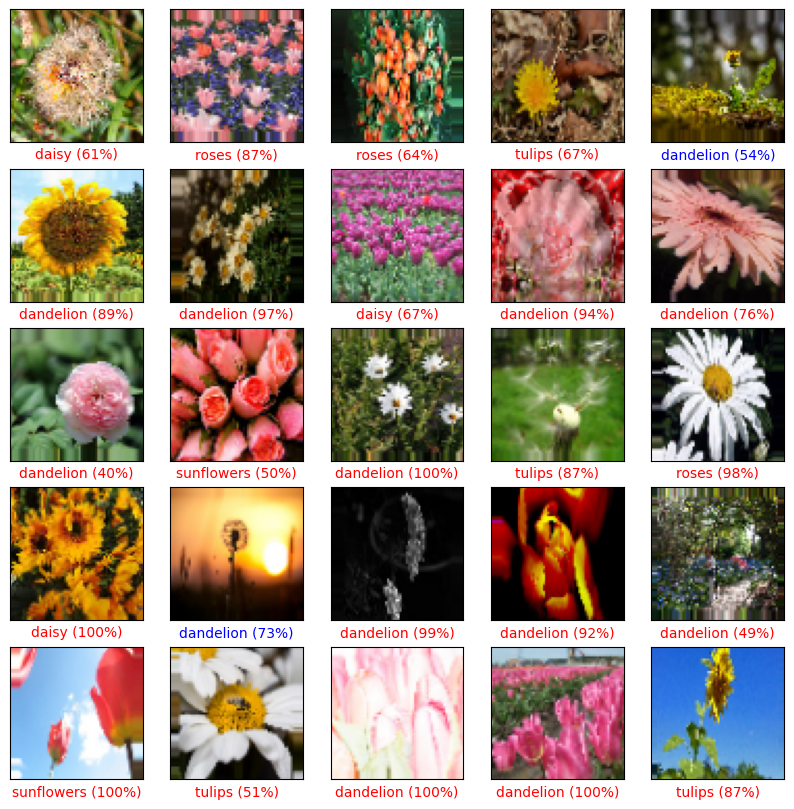

In [11]:
import matplotlib.pyplot as plt

# Access class_indices from traingen or testgen
testname = traingen.class_indices
print(testname)

def plot_example_predictions():
    predictions = model.predict(testgen)
    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        # Assuming testgen yields image data directly
        plt.imshow(testgen[i][0][0], cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions[i])

        # Accessing the true label from the test generator
        true_label = np.argmax(testgen[i][1][0])

        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'

        # Using the class names for labels
        plt.xlabel(f"{list(testname.keys())[list(testname.values()).index(predicted_label)]} ({100 * np.max(predictions[i]):2.0f}%)", color=color)

# Call the function to plot example predictions
plot_example_predictions()